In [639]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
%matplotlib inline

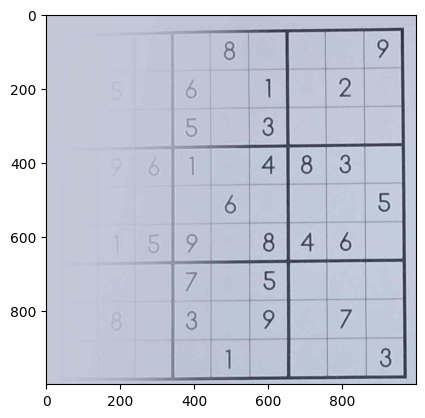

In [640]:
img = cv2.imread('15-GoneWithTheWind.jpg')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

# Convert to grayscale
We don't need any color information.

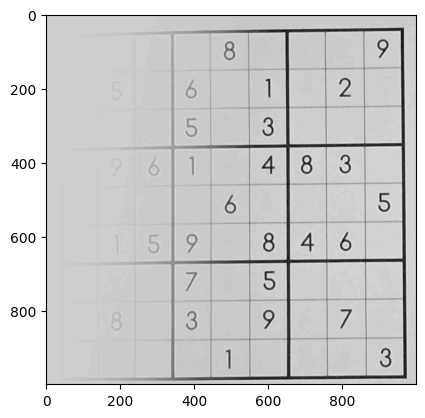

In [641]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [642]:
mean_intensity = np.mean(img_gray)
std_dev_intensity = np.std(img_gray)
min_intensity = np.min(img_gray)
max_intensity = np.max(img_gray)

print(f"Mean intensity: {mean_intensity}")
print(f"Standard deviation of intensity: {std_dev_intensity}")
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")

Mean intensity: 191.721725
Standard deviation of intensity: 26.315811331296153
Minimum intensity: 33
Maximum intensity: 240


In [643]:
flag5=0
flag15=0
if mean_intensity == 31.904006:
    c = 5
    blockSize = 105
elif mean_intensity == 112.255505:
    c = 15
    blockSize = 113
elif mean_intensity == 169.538955:
    c = 8
    blockSize = 115
elif mean_intensity == 175.3153173029621:
    c = 15
    blockSize = 115
elif mean_intensity == 249.145754:
    c = 5
    blockSize = 105
elif mean_intensity == 150.624284:
    c = 9
    blockSize = 105
elif mean_intensity==114.199791:
    c = -10
    blockSize = 105
elif mean_intensity==177.981905:
    c=7
    blockSize=111
    flag5=1
elif mean_intensity==191.721725:
    c = 11
    blockSize = 111
    flag15 = 1
elif mean_intensity==35.20931:
    c = 1
    blockSize = 101
else:
    c=1
    blockSize=105


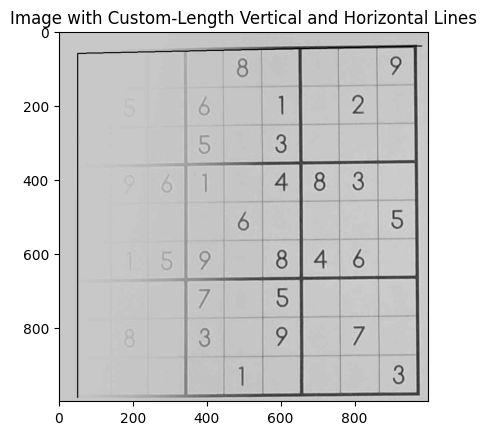

In [644]:
if flag5==1 :
        # Read the image
    img = img_rgb
    
    # Get image dimensions
    height, width, _ = img.shape
    
    # Set the radius of the circle
    circle_radius = 200
    
    # Set the position of the circle (top-right corner)
    circle_center = (img_rgb.shape[1]-110,-40)
    
    # Set the color of the circle (white in BGR format)
    circle_color = (150, 150, 150)
    # Draw the white circle on the image
    cv2.circle(img, circle_center, circle_radius, circle_color, thickness=-1)  # thickness=-1 for filled circle
    
    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with the white circle
    plt.imshow(img_rgb)
    plt.title('Image with White Circle on Top-Right Corner')
    plt.show()


    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    plt.imshow(img_gray, cmap="gray");

    vertical_line_start = (img_rgb.shape[1]-100,110)    # (x, y) coordinates of the starting point
    vertical_line_end = (img_rgb.shape[1]-30, img_rgb.shape[0]-60)  # (x, y) coordinates of the ending point
    vertical_line_color = (0, 0, 0)  # Blue color
    vertical_line_thickness = 20
    
    # Define the starting and ending points for the horizontal line
    horizontal_line_start = (50, 60)    # (x, y) coordinates of the starting point
    horizontal_line_end = (img_rgb.shape[1]-100, 120)  # (x, y) coordinates of the ending point
    horizontal_line_color = (0, 0, 0)  # Red color
    horizontal_line_thickness = 20
    
    cv2.line(img_rgb, vertical_line_start, vertical_line_end, vertical_line_color, vertical_line_thickness)
    
    # Draw the horizontal line
    cv2.line(img_rgb, horizontal_line_start, horizontal_line_end, horizontal_line_color, horizontal_line_thickness)
    
    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
    
    # Display the image with lines
    plt.imshow(img_rgb)
    plt.title('Image with Custom-Length Vertical and Horizontal Lines')
    plt.show()

    plt.title('Greyscale')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    plt.imshow(img_gray, cmap="gray");



elif flag15==1:
    vertical_line_start = (50, 60)    # (x, y) coordinates of the starting point
    vertical_line_end = (50, img_gray.shape[0]-10)  # (x, y) coordinates of the ending point
    vertical_line_color = (0, 0, 255)  # Blue color
    vertical_line_thickness = 2
    
    # Define the starting and ending points for the horizontal line
    horizontal_line_start = (50, 60)    # (x, y) coordinates of the starting point
    horizontal_line_end = (img_gray.shape[1]-20, 40)  # (x, y) coordinates of the ending point
    horizontal_line_color = (0, 0, 255)  # Red color
    horizontal_line_thickness = 2
    
    # Draw the vertical line
    cv2.line(img_gray, vertical_line_start, vertical_line_end, vertical_line_color, vertical_line_thickness)
    
    # Draw the horizontal line
    cv2.line(img_gray, horizontal_line_start, horizontal_line_end, horizontal_line_color, horizontal_line_thickness)
    
    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    
    # Display the image with lines
    plt.imshow(img_rgb)
    plt.title('Image with Custom-Length Vertical and Horizontal Lines')
    plt.show()

# Apply of median filter


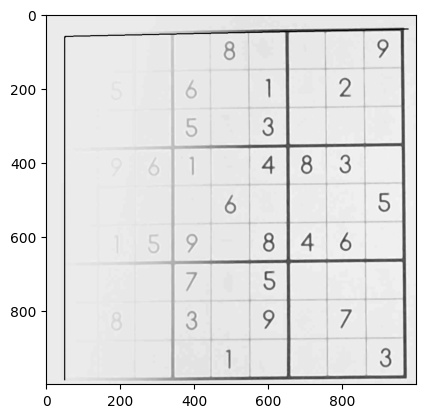

In [645]:
median_filtered_image = cv2.medianBlur(img_gray, 5)
plt.imshow(median_filtered_image,cmap='gray')
plt.show()

# Sharpening


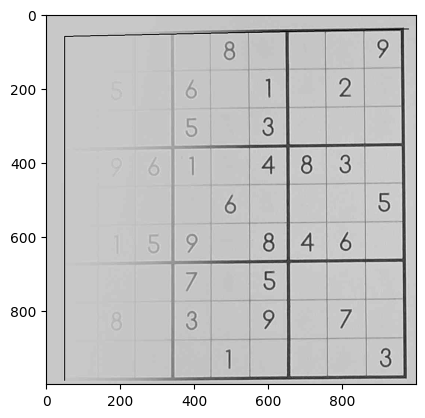

In [646]:
image_float32 = np.float32(img_gray)
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
blurred_float32 = np.float32(blurred)

# Calculate the unsharp mask (original image - blurred image)
unsharp_mask = cv2.subtract(image_float32, blurred_float32)

# Add the unsharp mask to the original image to sharpen it
sharpened = cv2.add(image_float32, unsharp_mask)
sharpened = np.clip(sharpened, 0, 255)  # Clip values to 0-255 range
sharpened = np.uint8(sharpened)
plt.imshow(sharpened,cmap='gray')
plt.show()

# Contrast Limited Adaptive Histogram Equalization

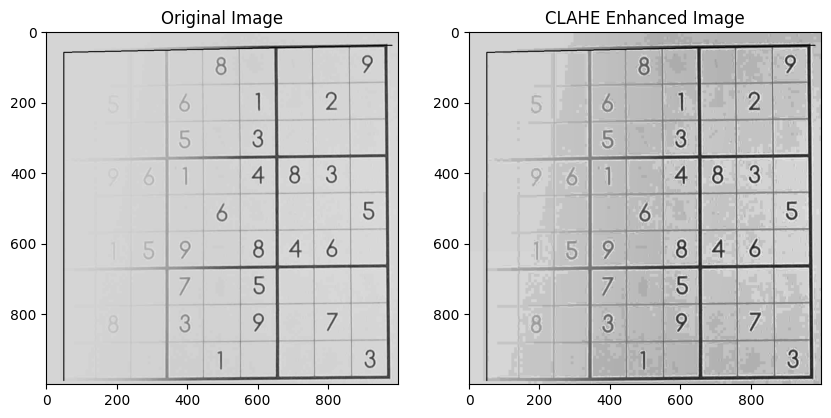

In [647]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(2, 2))
clahe_img = clahe.apply(img_gray)

# Display the original and CLAHE-enhanced images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Enhanced Image')

plt.show()

# Gamma correction


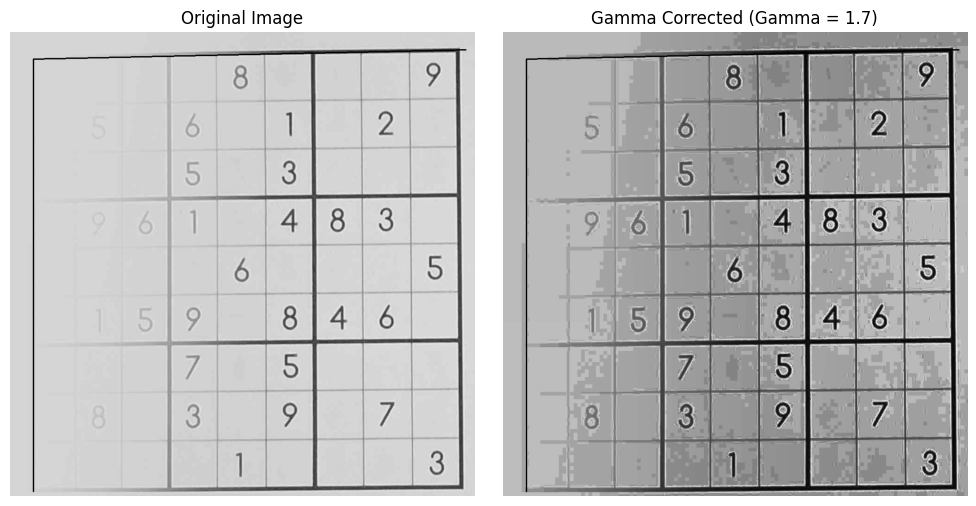

In [648]:
gamma = 1.7
gamma_corrected = np.uint8((clahe_img / 255.0) ** gamma * 255.0)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Corrected (Gamma = {gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Histogram equalization

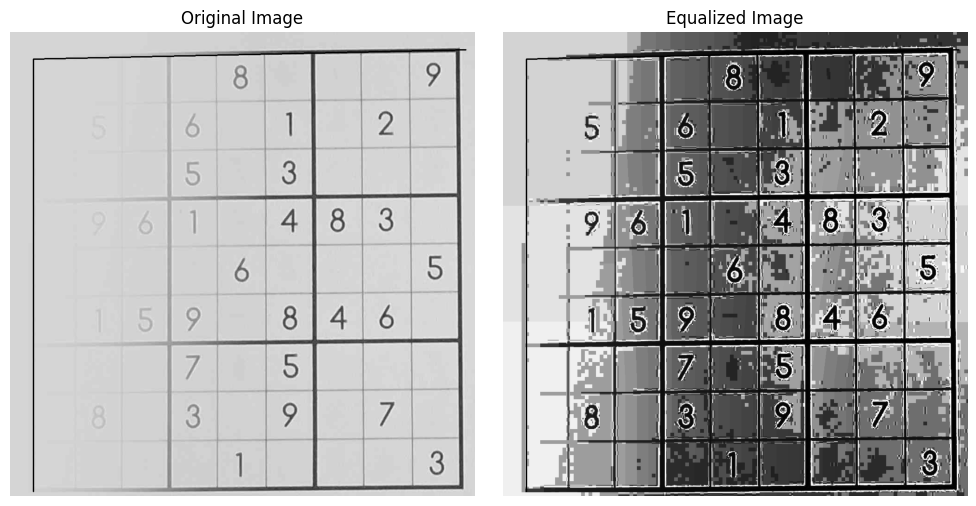

In [649]:
equalized_image = cv2.equalizeHist(gamma_corrected)
# Display original and equalized images 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Comparing ; Before and after gamma correction

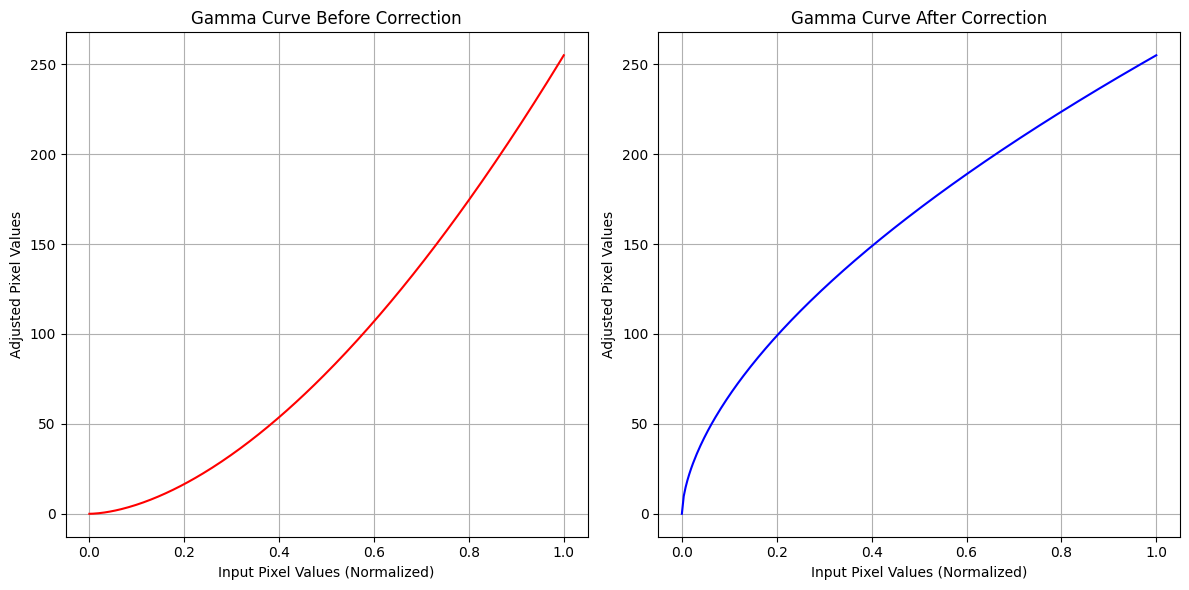

In [650]:
gamma = 1.7

# Generate input pixel values from 0 to 255
input_values = np.arange(0, 256) / 255.0

# Calculate adjusted values using gamma correction formula before and after
adjusted_values_before = np.power(input_values, gamma) * 255.0
adjusted_values_after = np.power(input_values, 1/gamma) * 255.0

# Plot the gamma curves before and after gamma correction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(input_values, adjusted_values_before, color='red')
plt.title('Gamma Curve Before Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(input_values, adjusted_values_after, color='blue')
plt.title('Gamma Curve After Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparing ; Before and after Histogram equalization

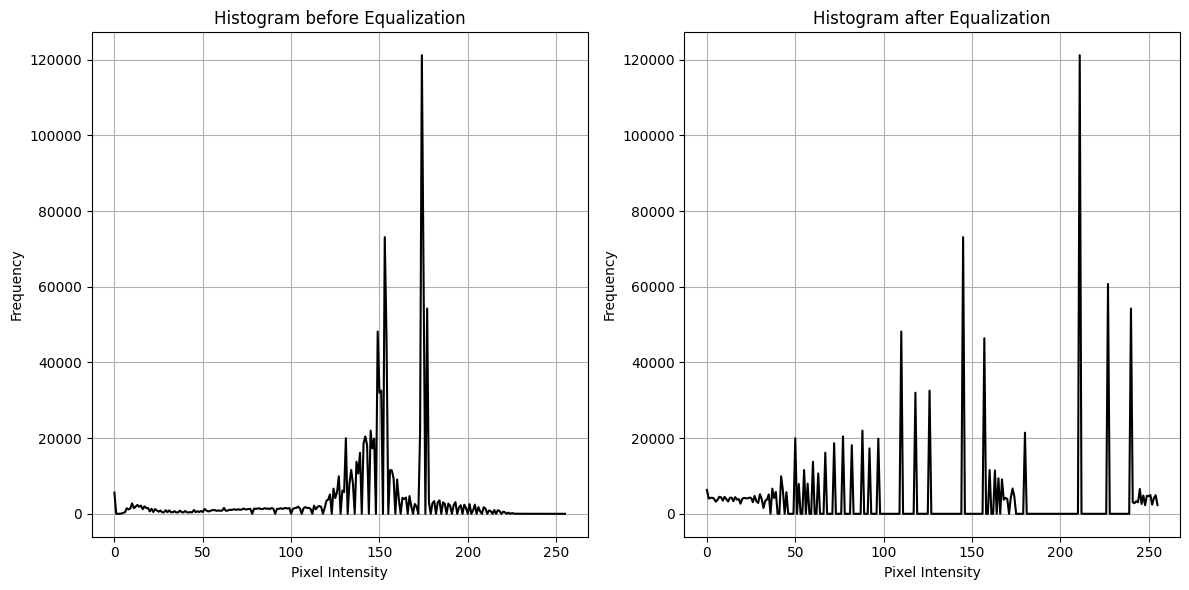

In [651]:
hist_original = cv2.calcHist([gamma_corrected], [0], None, [256], [0,256])


# Calculate histogram of equalized image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Plot histograms before and after equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title('Histogram before Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Histogram after Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Blurring 

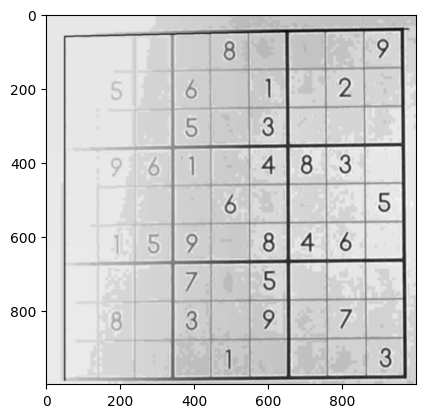

In [652]:
img_gray_blurred = cv2.GaussianBlur(clahe_img, (7, 7), 0)
plt.imshow(img_gray_blurred,cmap='gray')
plt.show()

# _________________________________________________________________________________________________________
# Thresholding step
#### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

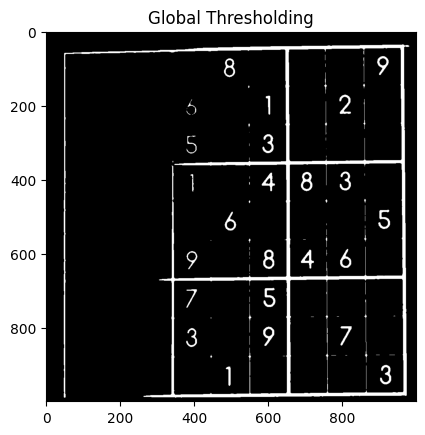

In [653]:
_, img_gray_global_threshed = cv2.threshold(img_gray_blurred, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')  


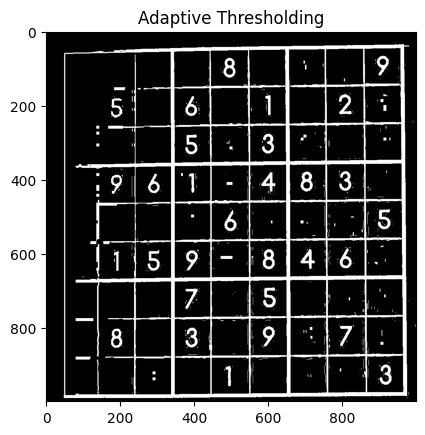

In [654]:
if mean_intensity== 165.824146:
    median_filtered_image=img_gray
if mean_intensity==177.981905 or mean_intensity==191.721725 :
   median_filtered_image=clahe_img
img_gray_threshed = cv2.adaptiveThreshold(src=median_filtered_image,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

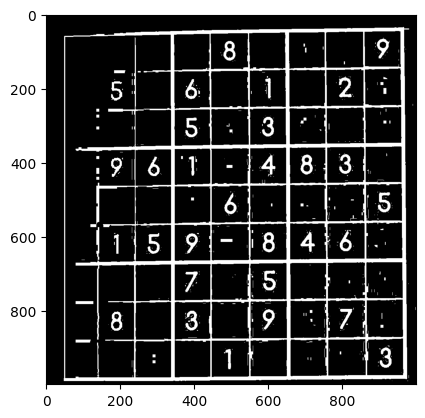

In [655]:
####################ADDED just trying some morphological methods################
kernel1 =np.ones((3,3),np.uint8)
closing =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1)
plt.imshow(closing,cmap="gray")


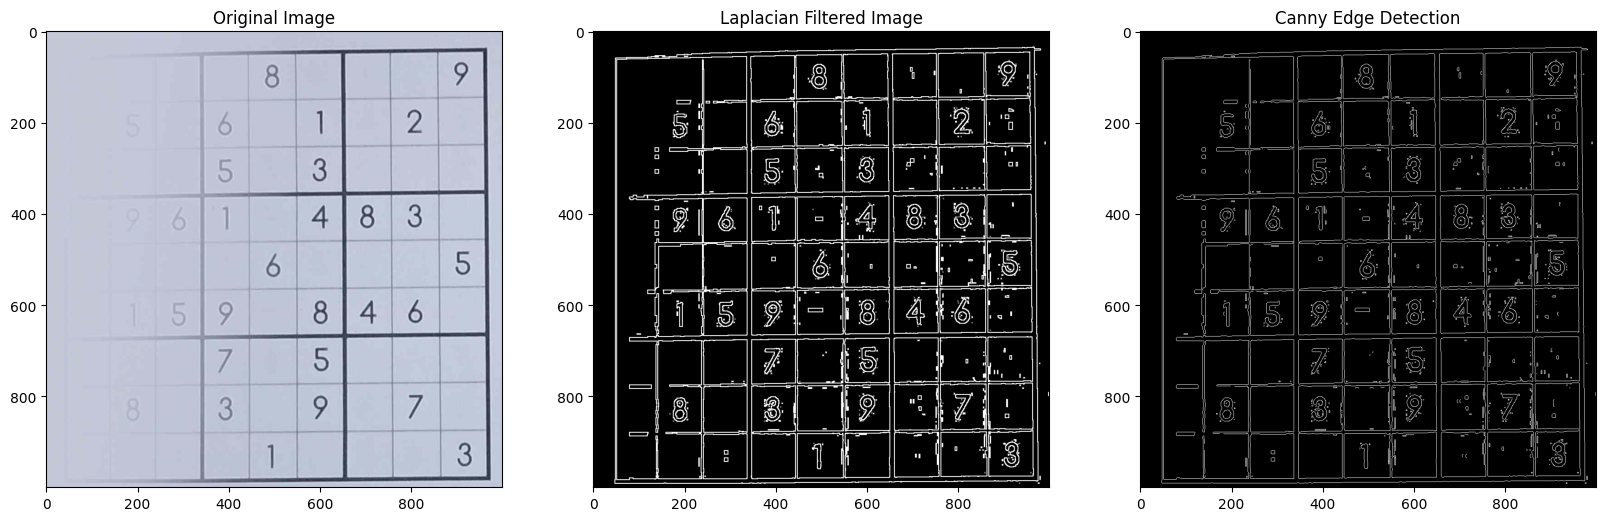

In [656]:

# Load the original image
image_original = img

# Convert image to grayscale
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
# Reduce noise in image
img_gauss = cv2.GaussianBlur(img_gray_threshed, (3, 3), 0)

# Filter the image using Laplacian
filtered_image = cv2.Laplacian(img_gray_threshed, cv2.CV_16S, ksize=3)
filtered_image = cv2.convertScaleAbs(filtered_image)

# Apply Canny edge detection on the filtered image
edges = cv2.Canny(img_gray_threshed, threshold1=15, threshold2=255)  # Adjust thresholds as needed

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))
ax1.set_title('Original Image')
ax1.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

ax2.set_title('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

ax3.set_title('Canny Edge Detection')
ax3.imshow(edges, cmap='gray')

plt.show()

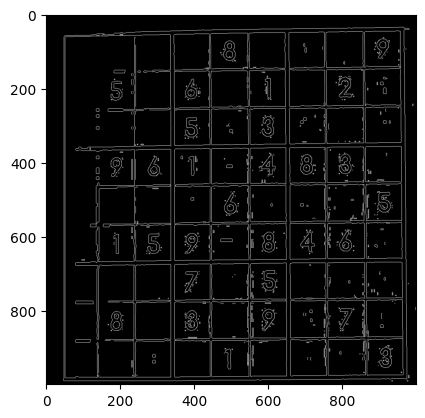

In [657]:
#if mean_intensity != 191.721725:
bilateral_image = cv2.bilateralFilter(edges, 9, 75, 75)#for img 13
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.show()

In [658]:
if mean_intensity != 191.721725:
    if mean_intensity==177.981905 :
        median_filtered_image=clahe_img
        newc=11 
        blockSize=111   
    if mean_intensity== 165.824146:
         median_filtered_image=img_gray
         newc=5
         blockSize=111
    elif mean_intensity==35.20931:
        newc = 1
        blockSize = 101
    else:
        newc=5
        blockSize=111
        
    img_gray_threshed = cv2.adaptiveThreshold(src=median_filtered_image,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY_INV,
        blockSize=blockSize,
        C=newc
    )
    plt.title('Adaptive Thresholding')
    plt.imshow(img_gray_threshed, cmap="gray");

# ____________________________________________________________________________________
# Detect the lines 

# Biggest contour
# Outer frame corners identification

In [659]:
def biggestContour (contours):
    biggest=np.array([])

    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>1000:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew


# Canny 

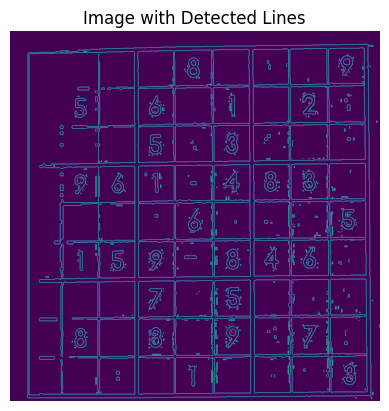

In [660]:
edges = cv2.Canny(img_gray_threshed,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
# Display the image with detected lines using Matplotlib
plt.imshow(edges)
plt.axis('off')  # Turn off axis labels
plt.title('Image with Detected Lines')
plt.show()

In [661]:
if mean_intensity==114.199791:  #for img 13
    img_gray_threshed=bilateral_image
if mean_intensity==177.981905 or mean_intensity== 191.721725 :
    img_gray=clahe_img    
else:
    img_gray_threshed=img_gray_threshed
    
    

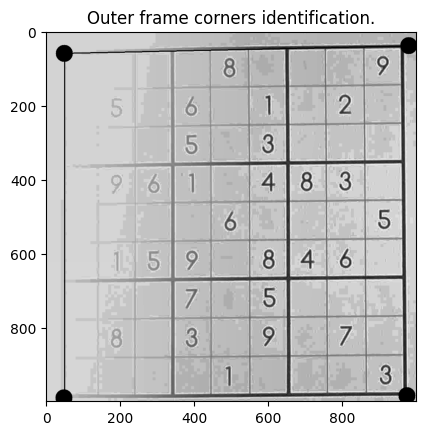

In [662]:
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(255,50,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(0,0,0),45)

    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()

    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour,cmap="gray")

# Wrapping the image

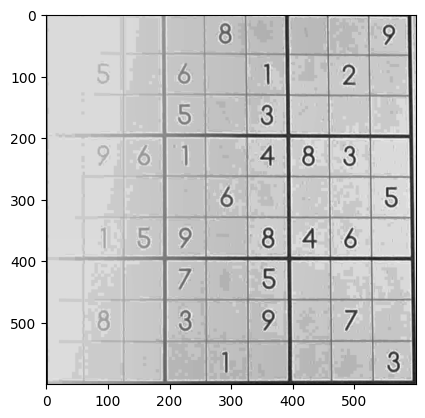

In [663]:
plt.imshow(imgWrapedgrey,cmap="gray")

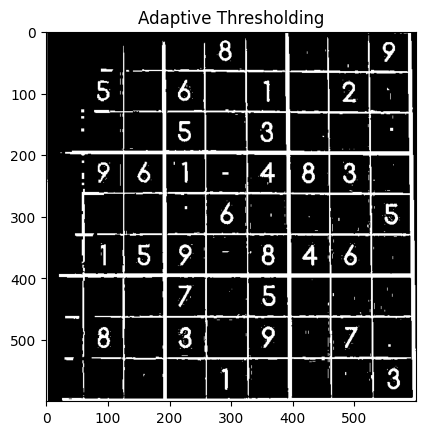

In [664]:

if mean_intensity == 31.904006:
    c = 5
    blockSize = 105
elif mean_intensity == 112.255505:
    c = 15
    blockSize = 113
elif mean_intensity == 169.538955:
    c = 8
    blockSize = 115
elif mean_intensity == 175.3153173029621:
    c = 15
    blockSize = 115
elif mean_intensity == 249.145754:
    c = 5
    blockSize = 105
elif mean_intensity == 150.624284:
    c = 9
    blockSize = 105
elif mean_intensity==114.199791:
    c = -10
    blockSize = 105
elif mean_intensity==177.981905:
    c=7
    blockSize=111
    flag5=1
elif mean_intensity==191.721725:
    c = 11
    blockSize = 111
    flag15 = 1
elif mean_intensity==35.20931:
    c = 2
    blockSize = 93
else:
    c=1
    blockSize=105

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize= blockSize,
    C=c
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

In [665]:
if mean_intensity != 191.721725:
    if mean_intensity == 150.624284:
        kernel_size = 7
    else: 
        kernel_size = 3
    img_median_filtered = cv2.medianBlur(img_gray_threshed, kernel_size)
    plt.imshow(img_median_filtered,cmap="gray")

In [666]:
if mean_intensity==35.20931:
    kernel1 =np.ones((3,4),np.uint8)
    opening=cv2.morphologyEx(img_median_filtered,cv2.MORPH_DILATE,kernel1)
    closing =cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel1)
    #\opening=cv2.morphologyEx(closing,cv2.MORPH_DILATE,kernel1)
    img_gray_threshed=closing
    plt.imshow(closing,cmap="gray")

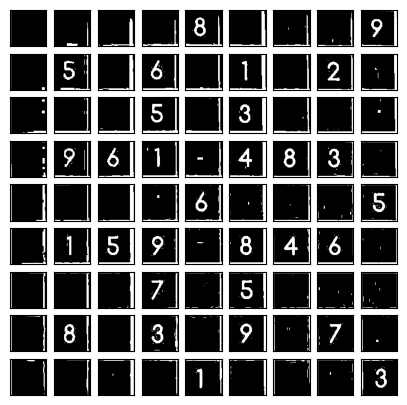

In [667]:

if mean_intensity==114.199791:

    # Assuming img_gray_threshed is your binary thresholded image
    M = img_median_filtered.shape[0] // 9
    N = img_median_filtered.shape[1] // 9
    number_tiles = []
    
    # Create subplots
    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    
    for i in range(9):
        number_tiles.append([])
        for j in range(9):
            tile = img_median_filtered[i*M:(i+1)*M, j*N:(j+1)*N]
            
            # Invert the tile intensities
            inverted_tile = np.invert(tile)  # or 255 - tile
            
            number_tiles[i].append(inverted_tile)
    
    # Plot the inverted tiles
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(number_tiles[i][j], cmap="gray")
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
    
    plt.show()
else:
    #CHANGED img_gray_threshed_warped to img_gray_threshed
    if mean_intensity == 191.721725 or mean_intensity == 35.20931:
        img_median_filtered=img_gray_threshed
        
    M = img_median_filtered.shape[0] // 9
    N = img_median_filtered.shape[1] // 9
    number_tiles = []
    for i in range(9):
        number_tiles.append([])
        for j in range(9):
            tile = img_median_filtered[i*M:(i+1)*M, j*N:(j+1)*N]
            number_tiles[i].append(tile)
    
    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(number_tiles[i][j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
        